In [ ]:
import os   
os.environ["ONNXRUNTIME_EXECUTION_PROVIDER"] = "[CUDAExecutionProvider]"

## Ball | Players | Goalie | Referee   Detection

In [ ]:
%pip install ultralytics



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
from ultralytics import YOLO
import supervision as sv

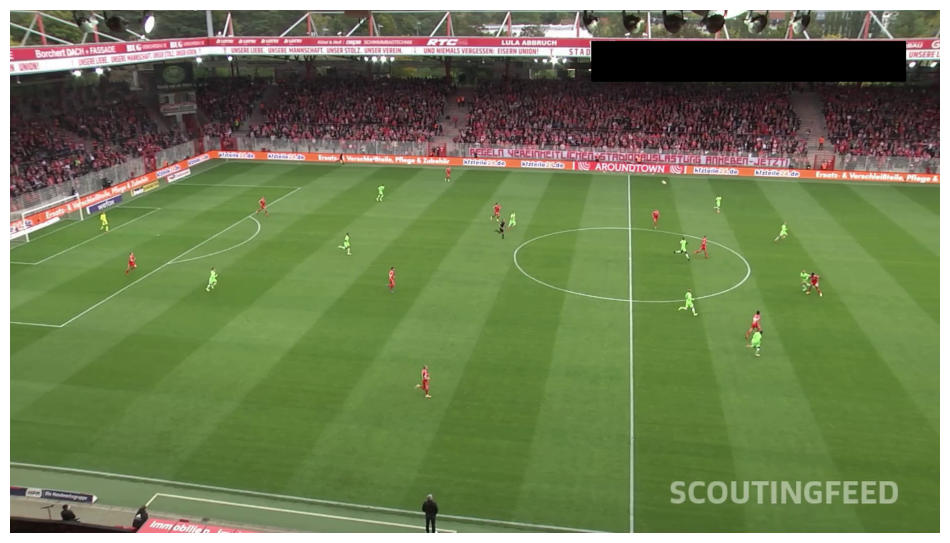

In [34]:
PLAYER_DETECTION_MODEL = YOLO("yolo11n.pt")
SOURCE_VIDEO_PATH = "121364_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)




In [22]:

tracker = sv.ByteTrack()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

bounding_box = sv.BoxAnnotator()
label = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()



def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = PLAYER_DETECTION_MODEL(frame)[0]
    detections = sv.Detections.from_ultralytics(results)

    tracked_pos = tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {class_name}"
        for class_name, tracker_id
        in zip(detections.data["class_name"], detections.tracker_id)
    ]

    annotated_frame = bounding_box.annotate(
        frame.copy(), detections=detections)
    annotated_frame = label.annotate(
        annotated_frame, detections=detections, labels=labels)
    return trace_annotator.annotate(
        annotated_frame, detections=detections)

sv.process_video(source_path=SOURCE_VIDEO_PATH,
                target_path="results.mp4",
                callback=callback)



0: 384x640 23 persons, 311.5ms
Speed: 3.5ms preprocess, 311.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 persons, 274.6ms
Speed: 3.2ms preprocess, 274.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 persons, 257.1ms
Speed: 2.7ms preprocess, 257.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 persons, 250.2ms
Speed: 2.8ms preprocess, 250.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 persons, 247.5ms
Speed: 3.5ms preprocess, 247.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 persons, 248.3ms
Speed: 2.7ms preprocess, 248.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 persons, 256.3ms
Speed: 3.0ms preprocess, 256.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 persons, 253.9ms
Speed: 2.8ms preprocess, 253.9ms inference, 2.3ms postproc

# Traning The Model

In [ ]:
results = PLAYER_DETECTION_MODEL.train(data="Players_data.yaml",
                                      epochs=50,
                                      imgsz=640)